In [2]:
import numpy as np
import pandas as pd 
import umap
import ast
import re

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'umap'

In [333]:
def convert_string_array(s):
    if type(s) == str:
        return np.array(ast.literal_eval(s))
    else:
        return s

In [1]:
df_t = pd.read_csv('/dlabdata1/lugeon/dmozfinalset/dmoz_en_full_train_finalemb.gz', index_col=0)
df_t.head(5)

NameError: name 'pd' is not defined

In [346]:
df_t = df_t[df_t.error.notna()]
df_t.reset_index(drop=True, inplace=True)

In [347]:
df_t.shape

(839, 12)

In [348]:
df_t[['uid', 'url', 'cat0']].to_csv('/dlabdata1/lugeon/dmozfinalset/dmoz_lang_final_clean_urls.gz', compression='gzip')

... Computing visual embeddings ...

In [349]:
df_v = pd.read_csv('/dlabdata1/lugeon/dmozfinalset/dmoz_lang_final_visual_embeddings.gz', index_col=0)
df_v.head(5)

,uid,embed_graph
0,1000753,"[0.8285545706748962, 0.204240083694458, 0.5238..."
1,1037990,"[0.1015053540468216, 1.2699116468429565, 0.580..."
2,1061845,"[0.902267575263977, 0.5432012677192688, 0.3332..."
3,1072071,"[1.0590864419937134, 1.7227996587753296, 1.381..."
4,1073520,"[0.5807888507843018, 0.42421793937683105, 0.87..."


In [353]:
df_t.shape

(839, 12)

In [350]:
df = df_t.merge(df_v, on='uid')

In [355]:
df.shape

(807, 13)

In [356]:
df.head(1)

,uid,url,cat0,error,embed_url,embed_domain,embed_metatags,embed_text,embed_title,embed_description,embed_keywords,embed_links,embed_graph
0,1674552,www.alain-zenthner.com,Arts,uimctdkl:ooooo___,"[0.02712850086390972, 0.17805646359920502, 0.1...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.04973355680704117, 0.03871486708521843, 0.1...","[0.02431866154074669, 0.03919200971722603, 0.1...",NaN,NaN,NaN,"[0.2583775222301483, 0.6421558260917664, 1.406..."


In [357]:
embeddings = [s for s in df.columns.values if s.startswith('embed')]
embeddings

['embed_url',
 'embed_domain',
 'embed_metatags',
 'embed_text',
 'embed_title',
 'embed_description',
 'embed_keywords',
 'embed_links',
 'embed_graph']

In [358]:
for e in embeddings:
    df[e] = df[e].apply(convert_string_array)

In [359]:
df.error.value_counts()

uimctdkl:oooooo_o    236
uimctdkl:ooooo__o    221
uimctdkl:oooooooo    202
uimctdkl:ooooo___     52
uimctdkl:ooooooo_     34
uimctdkl:oooooo__     15
uimctdkl:ooooo_oo     15
uimctdkl:ooo_____     13
uimctdkl:ooo_o___      5
uimctdkl:ooooo_o_      5
uimctdkl:oooo____      4
uimctdkl:oooo_ooo      2
uimctdkl:oooo_o_o      2
uimctdkl:oooo___o      1
Name: error, dtype: int64

In [360]:
xlmr_embeddings = ['embed_url', 'embed_text', 'embed_title', 'embed_description', 'embed_keywords', 'embed_links']

In [361]:
def xlmr_mean(row):
    mean = np.zeros(768)
    counter = 0
    for e in xlmr_embeddings:
        if type(row[e]) == np.ndarray:
            counter += 1
            mean += row[e]
    return mean / counter

In [363]:
df['xlmr_mean'] = df.apply(xlmr_mean, axis=1)

In [365]:
def remove_nan(val):
    if type(val) == np.ndarray:
        return val
    else:
        return np.zeros(768)
    

In [366]:
def replace_nan(column):
    is_nan = column.apply(lambda row: int(type(row) != np.ndarray))
    nan_removes = column.apply(remove_nan) 
    return df.xlmr_mean * is_nan + nan_removes * (1 - is_nan)

In [367]:
df[xlmr_embeddings] = df[xlmr_embeddings].apply(replace_nan)

In [368]:
df.isna().sum()

uid                  0
url                  0
cat0                 0
error                0
embed_url            0
embed_domain         0
embed_metatags       0
embed_text           0
embed_title          0
embed_description    0
embed_keywords       0
embed_links          0
embed_graph          0
xlmr_mean            0
dtype: int64

In [369]:
df.head(1)

,uid,url,cat0,error,embed_url,embed_domain,embed_metatags,embed_text,embed_title,embed_description,embed_keywords,embed_links,embed_graph,xlmr_mean
0,1674552,www.alain-zenthner.com,Arts,uimctdkl:ooooo___,"[0.02712850086390972, 0.17805646359920502, 0.1...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0.04973355680704117, 0.03871486708521843, 0.1...","[0.02431866154074669, 0.03919200971722603, 0.1...","[0.03372690640389919, 0.08532111346721649, 0.1...","[0.03372690640389919, 0.08532111346721649, 0.1...","[0.03372690640389919, 0.08532111346721649, 0.1...","[0.2583775222301483, 0.6421558260917664, 1.406...","[0.03372690640389919, 0.08532111346721649, 0.1..."


In [312]:
def concat_embeddings(row):
    emb = np.array([])
    for e in embeddings:
        emb = np.concatenate((emb, row[e]))
        
    return emb

In [370]:
df['embedding'] = df.apply(concat_embeddings, axis=1)

In [371]:
embs = np.column_stack(df.embedding.values)
embs = embs.transpose()

In [372]:
max(embs.flatten())

6.431870937347412

In [373]:
min(embs.flatten())

-1.4118852615356445

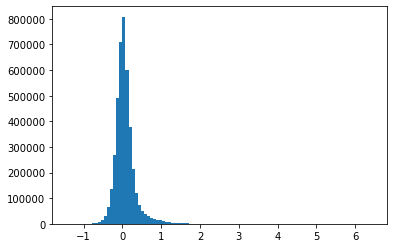

In [374]:
plt.hist(embs.flatten(), bins=100);

In [375]:
pca = PCA(n_components=688)
embs = pca.fit_transform(embs)

In [376]:
_umap = umap.UMAP(n_components=2)
_tsne = TSNE(n_components=2)

In [377]:
embs.shape

(807, 688)

In [378]:
x = _tsne.fit_transform(embs)

In [379]:
x

array([[ -9.661812 ,   1.2945883],
       [  6.891525 ,  -6.9893646],
       [ -9.09895  ,  -7.107668 ],
       ...,
       [ 10.296582 , -11.222055 ],
       [  5.735669 , -11.024166 ],
       [ -1.6827891,  -3.8500466]], dtype=float32)

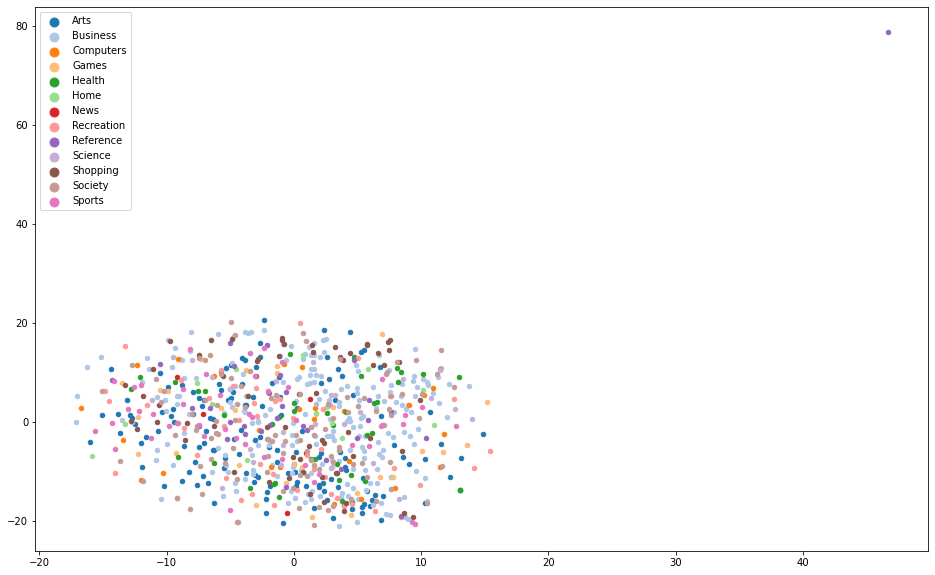

In [380]:
categories = np.sort(df.cat0.unique())

colormap = plt.get_cmap('tab20')

opacity = 1
marker_size = 20
marker = 'o'

fig, ax = plt.subplots(figsize=(16, 10))

n = 0
ncat = len(categories)

for cat in categories:
    ix = df[df.cat0 == cat].index
    x_val = x[ix][:,0]
    y_val = x[ix][:,1]
    plt.scatter(x_val, y_val, color=colormap(n), marker=marker, s=marker_size, alpha=opacity, label=cat)
    
    n += 1

#ax.set_xlim([5,15])
#ax.set_ylim([-5,10])

#ax.set_xticks([], [])
#ax.set_yticks([], [])
    
#plt.title('t-SNE decomposition of description content in meta tags')
plt.legend(markerscale=2, fontsize=10)
plt.plot();